In [135]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import statistics
from sklearn.preprocessing import StandardScaler

In [136]:
df = pd.read_csv('/Users/anastasiafedoracenko/Desktop/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [137]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
df = df[~(df['Age'].isna())]
df = df[~(df['Cabin'].isna())]
df = df[~(df['Embarked'].isna())]

#удаляем все пропущенные данные 

In [140]:
del df['Name']
del df['Sex']
del df['Ticket']
del df['Cabin']
del df['Embarked']

In [141]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [142]:
x = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [144]:
model = LinearRegression().fit(x, y)
model

LinearRegression()

In [145]:
predictions = model.predict(x_test)
model.predict(x_test)

array([0.70330884, 0.67683087, 0.5187449 , 0.58710487, 0.74302472,
       0.5038552 , 0.83093377, 0.67921318, 0.75696346, 0.92372139,
       0.92670525, 0.63542817, 0.49203223, 0.68752412, 0.82934256,
       0.74284204, 0.81083444, 0.95061292, 0.35783115, 0.55209177,
       0.65752589, 0.7293231 , 0.6902066 , 0.95598003, 0.71379902,
       0.48103969, 0.7460308 , 0.50507679, 0.50105529, 0.81627177,
       0.82874032, 0.51368389, 0.62386526, 0.477307  , 0.71230717,
       0.73242609, 0.40621651])

In [146]:
model.score(x_train, y_train) 

0.13342609909272174

In [147]:
model.score(x_test,y_test)

0.03415174041861324

Данных не так много, поэтому делю их 80/20, а не 70/30, что б в обучение была бо'льшая выборка, для лучшей точности. 

- Теперь подгружаем заново те же данные, но теперь обработаем и подчистим их

In [148]:
df1 = pd.read_csv('/Users/anastasiafedoracenko/Desktop/train.csv')
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [149]:
df1['Sex'] = df1['Sex'].astype('category')
df1['gender'] = df1['Sex'].cat.codes


Cразу меняю пол на бинарный вид, что б я могла удалить занчение пола в строковом формате.

In [150]:
count = ['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId', 'Embarked']
df1.drop(count, inplace = True, axis = 1)


Имя не влияет на выживаемость никак, пол мы перевели в бинарный вид, он тоже больше не нужен, билет - бесполезное значение для нас, номер кабины мог бы иметь значение, если бы мы знали расположение кабин или кол-во человек в кабине, или все нумерации(тогда бы умерших могли бы "поселить" в кабины, которые дальше от палубы находятся, а выживших, соответственно, ближе к палубе), но мы не распологаем этими данными, поэтому удаляем столбец. Класс обслуживания на выживаемость тоже не влияет, это уровень комфорта, нам не потребуется, и последнее, это id пассажира, что, по сути, не несет в себе никакой информации для нас, кроме последовательности.  

In [151]:
df1.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
gender        0
dtype: int64

Видим пропущенные значения только в возрасте остались 

In [153]:
df1['Age'].fillna(df1['Age'].mean(), inplace = True)
        
df1.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
gender      0
dtype: int64

In [154]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [155]:
df1.info()

#нужно преобразовать тип данных в колонке Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   gender    891 non-null    int8   
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.8 KB


Подставила все нужные значения, пропуски подчистила. Далее в этапах идет перевести категориальные переменные в цифровые значения, но пол я перевела чуть выше, так что сейчас можно пропустить этот пункт и перейти к проверке на выбросы. 

<AxesSubplot:title={'center':'Проверка выбросов на стоимость билетов'}>

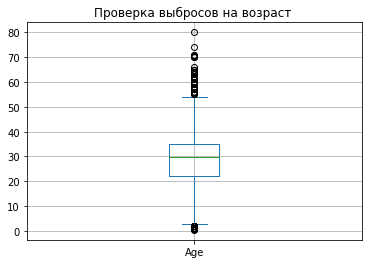

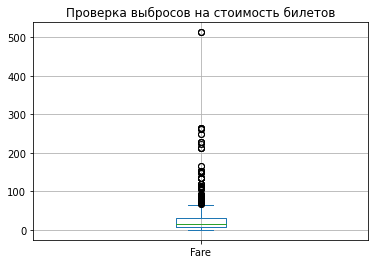

In [156]:
df1[['Age']].plot( kind = 'box', grid = True, title = 'Проверка выбросов на возраст ')
df1[[ 'Fare']].plot( kind = 'box', grid = True, title = 'Проверка выбросов на стоимость билетов')

#решила проверить выбросы по стоиости билетов, что б убедиться, что никто не попал на судно "по блату" и тд 

Итак, отлично, видим выброс по цене выбросы, я бы убраал все, что дороже 200, и посмотрела бы еще раз. Что касается возраста: есть выброс в ~67-80 лет и до ~3-6 лет, я бы их убрала, потому что очень пожылым и очень, соответсвенно, маленьким людям спастись самостоятельно очень тяжко. 

In [157]:
df1 = df1[df1.Age <= 67]
df1 = df1[df1.Age >= 6]
df1 = df1[df1.Fare <= 200]

Еще раз проверим данные на те же выбросы

<AxesSubplot:title={'center':'Еще проверка выбросов на стоимость билетов'}>

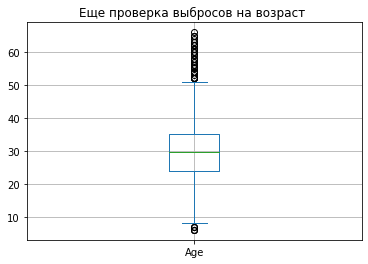

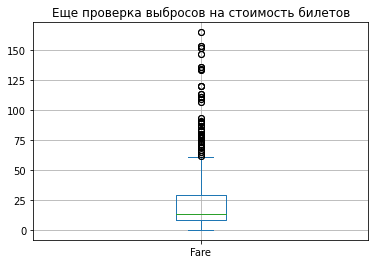

In [158]:
df1[['Age']].plot( kind = 'box', grid = True, title = 'Еще проверка выбросов на возраст ')
df1[[ 'Fare']].plot( kind = 'box', grid = True, title = 'Еще проверка выбросов на стоимость билетов')

Теперь видим, что выбросов слишком много и я бы больше не хотела бы их чистить, вдруг это выбросы и повлияли на чью-то выживаемость( к примеру: люди с возрастом 50+ чуть медленнее передвигались, соответственно не первые в шлюпку залекзли, или людис билетами дороже средней цены находились ближе в палубе, соответственно первые успели выскочить),оставляю. 

<AxesSubplot:xlabel='Age,Survived'>

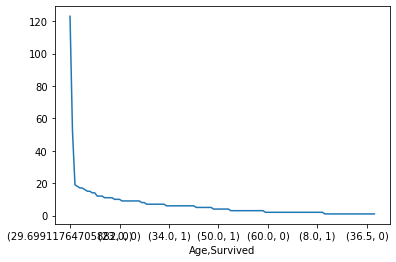

In [159]:
df1[['Age', 'Survived']].value_counts().plot()

#Чаще люди спасались в более активном возрасте, а в маленьком или ближе к пожилому, меньше людей 

<AxesSubplot:xlabel='Survived,Pclass'>

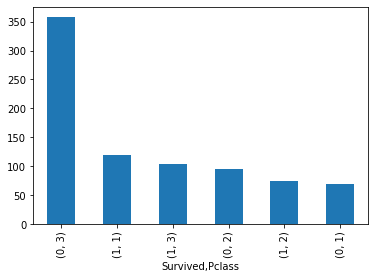

In [160]:
df1[['Survived', 'Pclass']].value_counts().plot(kind = 'bar')

#тут не очень упорядочено, но видим, что умерло больше всего людей находившихся в 3 классе обслуживания, а больше
#всего выжило людей из 1 класса обслуживания, и меньше всего умерло людей из 1 класса 

<AxesSubplot:xlabel='SibSp,Parch,Survived'>

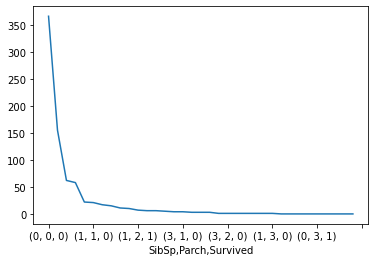

In [161]:
df1[['SibSp', 'Parch', 'Survived']].value_counts().plot()

#не очень показательный график, но тут видно что очень много людей не выжило, кто не имел родственников на борту 
#имея одного родителя/ребенка или брата/сестру тоже много не выжило, нет четкой закономерности, но на 
#обучение модели может повлиять(возможно)

In [168]:
x1 = df1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender']]
y1 = df1['Survived']

In [169]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 7)

In [170]:
model = LinearRegression().fit(x1, y1)
model

LinearRegression()

In [171]:
predictions1 = model.predict(x1_test)
model.predict(x1_test)

array([ 0.4318436 ,  0.85261992,  0.65822647,  0.05021829,  0.47532849,
        0.55371657,  0.105738  ,  0.59191614, -0.00946181, -0.01698334,
        0.68916349,  0.10816939,  0.0492184 ,  0.05357526,  0.28079283,
        0.14589463,  0.74641517,  0.12049261,  0.3816027 ,  0.40152589,
        0.0389947 ,  0.75345546,  0.12594484,  0.19264205,  0.62839439,
       -0.09480432,  0.41982013,  0.66770407,  0.78522396,  0.69974384,
        0.51925163,  0.05648025,  0.26274425,  0.65759712,  0.7840944 ,
        0.73518082,  0.73931839,  0.35016119,  0.06834443,  0.9704171 ,
        1.04620228,  0.0941617 ,  0.5943006 ,  0.40073344,  0.40475851,
        0.11042168,  0.12370551,  0.85531512,  0.18044573,  0.70252939,
        0.12384959,  0.09831606,  0.74366348, -0.26072269,  0.88941228,
        0.23235434,  0.86643945,  0.69366904,  0.90070526,  0.23260589,
        0.02183477,  0.41891458,  0.95388974,  0.5943006 ,  0.75057382,
        0.23118828,  0.27147199,  0.36327201,  0.09721595,  0.56

In [172]:
model.score(x1_train, y1_train) 

0.4004987182089671

In [173]:
model.score(x1_test, y1_test) 

0.4092948500316166

Меня не устраивает вероятность в 40%, но лучше у меня не получилось, допускаю что это моя лажа. 


## ВЫВОДЫ 

- c данными работать интересно, потому что любой фактор может показаться значительным и наоборот, много аналитической работы. Изначально я почистила датафрейм от тех столбцоы, которые являются абсолютным рандомом или, допустим, абсолютно не важны без доп инфы, которой мы не обладаем( на пример можно было бы оставить порт посадки с предположением того, что в каком-то порту село больше бедных людей, из-за ситуации с работой в определенных регионах, что обозначало бы, что чем дешевле билет - тем дальше от палубы каюты, соответственно меньше шансов на выживаемость, но это я придувыаю уже, потому что для такого размаха нужно изучать отдельные регионы в определенные период времени) . Далее заменили важный строковый формат данных на бинарный вид, что более логично. После чего заменили пропуски на логичные значения(я бы отталкивалась от класса и наиболее встречаемого возраста, то есть ставила бы моду, но по категориям, или к прмеру, в зависимости от кол-ва родных, стоимости билета и тд, но тут нужны были бы полиномеальные фичи). После чего определила явные выбросы, но оставила кучковатые "выбросы" что б их учесть при обучении, посколько их не мало было и они могли внести свою лепту ( хотя теперь я думаю, если бы я чисто начисто убрала бы выбросы, возможно оценка точности предсказаний была бы выше). После чего я вновь обучила модель на уже новых и готовых признаках, построила предсказание с помощью линейной регресии и оченила их точность. ПОвторюсь, меня эта точность очень расстроиа :(


- В 2 пункте метрика модели была построена на абсолютно абсурдных значениях, поскольку они без доп инфы не имели никакого веса для нас, там точность предсказания составила 13, в новой, второй, метрике модели мы подготовили данные, обработали их, заменили пустые значения, то есть была проделана аналитическая работа, котора в итоге помогла получить 40 процентов точности, хотя душе было бы приятно, если бы было хотя бы больше половины)) 


- на счет целесообразности работы с данными при машинном обучение: 
  Аналитическая работа очень круто помогает взглянуть на данные не как на плоский фрагмент "чего-то" для "чего-то", а помогает взглянуть под другим углом, пощупать, исправить, то есть данные для модели это практически 60, если не больше, процентов от успеха.  Работа с данными не отъемлемая часть развивтия сферы. Понимаю, что звучит избито, но это так. Если задача саентиста состоит в том что бы построить классную модель, которая будем работать на результат ( условно), то аналитическая часть этого процесса = залог лучшего результата. 
  
  
- по поводу больших данных. Если есть видимые, не частые, но понтные пропуски, то я считаю что да, нужно. 
    мое мнение какое, большинство случаев частные, перманентно ничего работать не будет в этой сфере(опять же, условно), если есть потребность, если это зависящий фактор - то, наверно, да. Но скорее всего, я считаю, что при работе с большими данными обработкой этих самых данных никто не занимается, там другой масштаб, проще выкинуть строчку при половине пропусков.